# Machine Learning and Statistics
***

# scikit-learn
***

<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/640px-Scikit_learn_logo_small.svg.png" width="450"/>

<br>

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/SharonNicG/52954-Machine-Learning-and-Statistics/blob/main/scikit-learn.ipynb) 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SharonNicG/52954-Machine-Learning-and-Statistics/HEAD?labpath=https%3A%2F%2Fgithub.com%2FSharonNicG%2F52954-Machine-Learning-and-Statistics%2Fblob%2Fmain%2Fscikit-learn.ipynb)

<br>

**Import Libraries**

In [1]:
import numpy as np
# Evenly spaces values in arrays
from numpy import arange
# Data frames
import pandas as pd
# Read CSV data quickly into Pandas
from pandas import read_csv
# Customise display-related options
from pandas import set_option
# Explore trends in data
# https://www.marsja.se/pandas-scatter-matrix-pair-plot/
from pandas.plotting import scatter_matrix
# pyplot is a module that is a simple and easy way to construct plots
from matplotlib import pyplot
# Allows matplotlib graphs to be included in the notebook next to the code
%matplotlib inline
# Fancier, statistical plots
import seaborn as sns
# Measures classification performance
from sklearn import metrics
# Model fit metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Data transformations
from sklearn import preprocessing
# Standardization, mean removal and variance scaling
from sklearn.preprocessing import StandardScaler
# Evaluation scores by cross-validation
from sklearn.model_selection import cross_val_score
# Cross-validation iterator
from sklearn.model_selection import KFold
# Splits arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# Combines preprocessor and the classifier into a single pipeline
from sklearn.pipeline import Pipeline
# Functionaility for neighbors-based machine learning
from sklearn import neighbors
# K-Nearest Neighbours Regression functionaility 
from sklearn.neighbors import KNeighborsRegressor
# Linear regression functionaility
from sklearn.linear_model import LinearRegression
# Decision Tree Regression functionality
from sklearn.tree import DecisionTreeRegressor
# Plotting for Decision Tree algorithm
from sklearn.tree import plot_tree
# Returns the square root of any number
from math import sqrt
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Introduction

Statistics is the study of data. It identifies data's properties and/or the assumptions
made about data built on the information provided [1]. 

In machine learning, statistical methods are used to solve defined problems. The 'machine' is programmed to apply algorithms to fit an analysis model to the data provided. In fitting the model to the data, the 'machine' learns how to treat variables in the dataset. It uses that knowledge to improve the accuracy of its results each time[2]. 

Providing understandable and workable data is vital to machine learning. The 'machine' is programmed to execute a series of actions on the provided dataset, not to determine if it is correct. For example, applying machine learning to a dataset that describes features of wine [3] and their associated quality score index could help predict the quality of wines outside of the dataset. For example, if all known Barolo wines produced in 2010 have a high-quality score, and the 'machine' is presented with details of a new 2010 Barolo wine, it is likely to predict that the wine is good. However, if the wine were actually 2017 Barolo, and the wrong data was supplied, the score assigned would be inaccurate because of the inputted data and not the Machine Learning process.

***

# scikit-learn 

scikit-learn [4] is a free, open-source library of machine learning tools compatible with Python[5]. 

It was developed in 2007 as a Google Summer of Code project [6] in 2007, by data scientist David Cournapeau. The name scikit describes the idea that the library is a toolkit for the SciPy library – a Scikit. The project has grown significantly since and was first released to the public in 2010 [7].

The library consists of ready to use machine learning algorithms that can be applied to a problem using the Python interface. This includes algorithms for classification, regression, clustering, dimensionality reduction, model fitting, and pre-processing [8][9].

As an open-source product, it encourages innovation as the library evolves through application by its users. Working within the Python ecosystem means that scikit-learn is available to a fast-growing community of users [10], can work with the other libraries within Python – including SciPy [11], which it is built upon – and has the flexibility to work with different programming styles and on different platforms [12]. 

Using scikit-learn provides a level of robustness to machine learning in Python. Furthermore, using its prebuilt algorithms offers reliability and efficiency challenging to achieve in 'hardcoding' an algorithm. 

It also makes the complicated mathematical functions used in machine learning algorithms more accessible to programmers. Of course, understanding the fundamentals of statistics and modelling is necessary to use the scikit-learn, but the library provides abstraction from the core mathematics for the user.  

***

## Machine Learning Styles
There are several ways to conduct machine learning. First, the machine learning style used to create an algorithm is selected based on the types of input and outputs for the problem.
The four main learning styles are:

- Supervised 
- Unsupervised 
- Autonomous/Self-Supervised 
- Reinforcement 

**Supervised**

Supervised machine learning takes data that has been labelled (tagged or classed with an identifier) as its input and returns an expected result as its output[13][14]. 

In Supervised machine learning, algorithms use training to create a model. An algorithm is then applied to fit that model to the data provided. The 'machine' learns through continuous training, and results become more accurate.

The expected results of training help determine which algorithm to apply. Regression problems seek to predict a numeric/outcome—for example, the quality score of a wine based on the grape type and year of production. Classification problems seek a qualitative variable/result. For example, determining a flower's class based on their sepal and petal measurements. Supervised Learning algorithms (like Linear Regression [15] and K-Nearest Neighbour [16] are bested suited to these problems. 

**Unsupervised**

In unsupervised machine learning, the data isn't labelled, and the results are unknown [17] [18]. Here the data is analysed to identify any structures therein. This analysis produces a model for analysing the data. The 'machine' learns how to fit the model to the data based on its analysis of the information provided. The algorithms applied to these problems can cluster similar data together or detect anomalies in the dataset.

Unsupervised learning algorithms (like Factor Analysis [19] and Outlier Detection [20] are bested suited to these problems. 

**Autonomous/Self-Supervised**

Autonomous/self-supervised machine learning is like supervised machine learning as it takes labelled data and returns an expected output [21]. However, it doesn't require the result to be defined. Instead, it learns the output's label based on externally sources or data patterns. 
The sklearn.semi_supervised module [22] and scikit-learn algorithms for regression and classification work can adapt models to act like an autonomous/semi-supervised algorithm [23].

**Reinforcement**

Reinforcement machine learning works similarly to Autonomous/Self-supervised machine learning [24]. But with the addition of reinforcement of a program's behaviour based on positive or negative feedback. The requirements of this type of machine learning are out of the scope of the scikit-learn library [25].

***

This notebook will focus on Supervised Machine Learning using three different algorithms. Three different algorithms will be applied to the same dataset to see the different ways machine learning can analyse a problem and the variation in outputs they can provide.

### Boston House Price Dataset

<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/michael-browning-ZLN2WOVpjCo-unsplash.jpg" width="400"/>

---------------------------

The Boston House Price dataset contains information about houses in a Boston suburb or town drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970 [26].

This data was previously a part of the UCI Machine Learning Repository [27] and was inbuilt to the scikit-learn library. However, it has since been removed from the UCI Machine Learning Repository and is being removed from the scikit-learn library. This is due to ethical issues around assumptions made in creating the dataset and the validity of its purpose [28]. More information on this is available here on the [scikit-learn website](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

An essential lesson for anyone working with data is to trust but verify.

In [2]:
# from sklearn.datasets import load_boston
# df_boston = load_boston()
# print(df_boston.DESCR)

To futureproof the functioning of this notebook, the dataset was downloaded and read into the notebook from a CSV file.

Details of the dataset characteristics available as part of the UCI Machine Learning Repository and scikit-learn library are reproduced below.

**Data Set Characteristics**  

    Number of Instances: 506 

    Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    Missing Attribute Values: None

The version downloaded from http://lib.stat.cmu.edu/datasets/boston appears to have been processed. However, online research shows that other dataset versions are missing values. No missing values are recorded in this dataset.

For easier referencing late in the model, the attributes have been assigned short names matching those used by the UCI Machine Learning Repository and the scikit-learn library.

In [3]:
filename = 'Data/housing.csv'

In [4]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
dataset = read_csv(filename, delim_whitespace=True, names=names)

#### 1. Analyze Data

An initial look at the loaded data [29].

Confirming the dimensions of the dataset - the number of rows and columns - match the characteristics expected.

In [6]:
print(dataset.shape)

(506, 14)


The results show 506 data instances with 14 attributes.

Now that we know the size and shape of the data, let's look at the types of data associated with each attribute.

In [7]:
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


All attributes are numeric, mostly floats, and two are integers.

The next step is to have a quick look at the data (the first 10 rows of the dataset) to see what it looks like. 

In [8]:
print(dataset.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

The values associated with each attribute varies widely (e.g. RAD 1-5 and CRIM 1.05-9.38).

To get a better feel for the ranges of these distributions, we can request the statistical descriptions of each attribute. Setting the precision for the data will make it easier for the floats (the primary data type)[30].

In [9]:
set_option('precision', 2)
print(dataset.describe())

           CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS  \
count  5.06e+02  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean   3.61e+00   11.36   11.14    0.07    0.55    6.28   68.57    3.80   
std    8.60e+00   23.32    6.86    0.25    0.12    0.70   28.15    2.11   
min    6.32e-03    0.00    0.46    0.00    0.39    3.56    2.90    1.13   
25%    8.20e-02    0.00    5.19    0.00    0.45    5.89   45.02    2.10   
50%    2.57e-01    0.00    9.69    0.00    0.54    6.21   77.50    3.21   
75%    3.68e+00   12.50   18.10    0.00    0.62    6.62   94.07    5.19   
max    8.90e+01  100.00   27.74    1.00    0.87    8.78  100.00   12.13   

          RAD     TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00  506.00   506.00  506.00  506.00  506.00  
mean     9.55  408.24    18.46  356.67   12.65   22.53  
std      8.71  168.54     2.16   91.29    7.14    9.20  
min      1.00  187.00    12.60    0.32    1.73    5.00  
25%      4.00  279.00    17.40  375.38 

Again there is a wide variation staticial values ofr each attribute (e.g. CRIM min = 6.32 amd TAX min = 187.00).

Finally, we can look at the correlation between the attribute columns for this initial analysis.
The Pearson method is used here. This is the standard correlation coefficient - it measures the strength of a linear association between two variables [31].

In [10]:
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

Some of the attributes appear to have a strong correlation. For example, 

- AGE and NOX with 0.73
- DIS and NOX with -0.78
- DIS and INDUS with -0.71

#### 2. Data Visualisation

While the statistical information is informative, data visualisations can help identify trends and patterns [32].

Histograms are useful for viewing the distribution of data in a dataset. Let's look at histograms for each of the attributes.

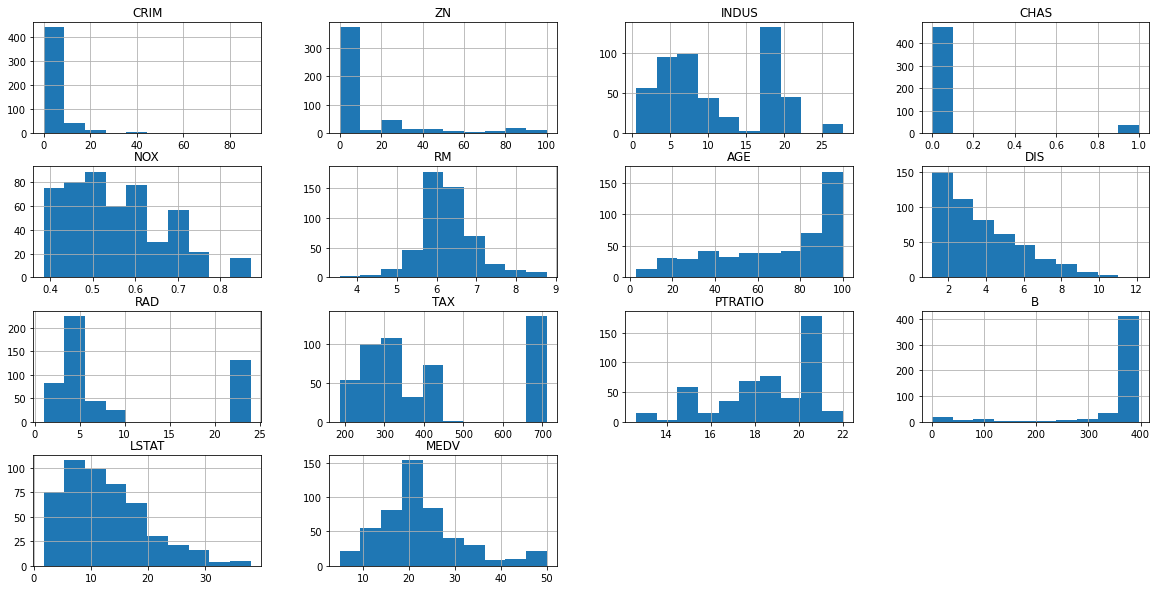

In [11]:
dataset.hist(figsize=(20, 10))
pyplot.show()

The histograms show some attributes such as CRIM and AGE have an exponential distribution [33]. Others, such as RAD and TAX, demonstrate data clusters with peaks at either end of their scale.

Plotting the same data using Density Plots [34] allows us to see the same data represented in the histograms but as a smoothed-out continuous line. This is helpful when looking at several attributes.

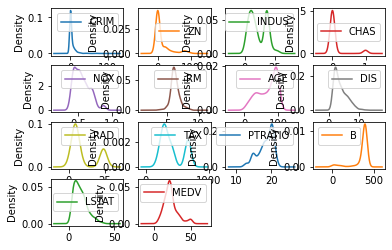

In [12]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
pyplot.show()

The distribution patterns seen in the histograms are much easier to see here.

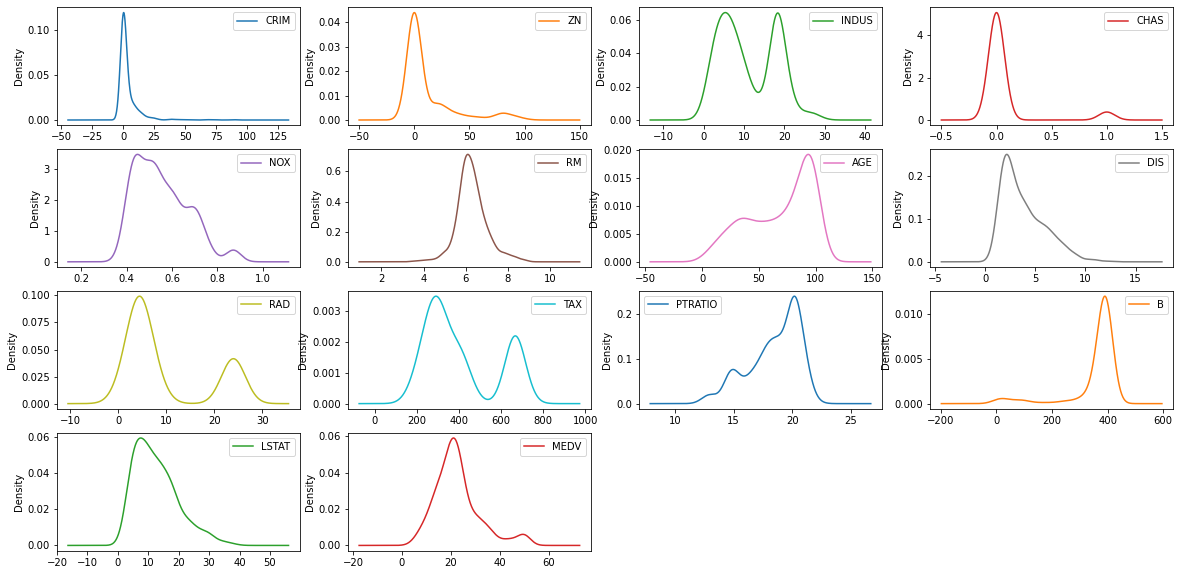

In [13]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(20, 10))
pyplot.show()

Using Box and Whisker plots, it is possible to see how the data is spread within each attribute [35].

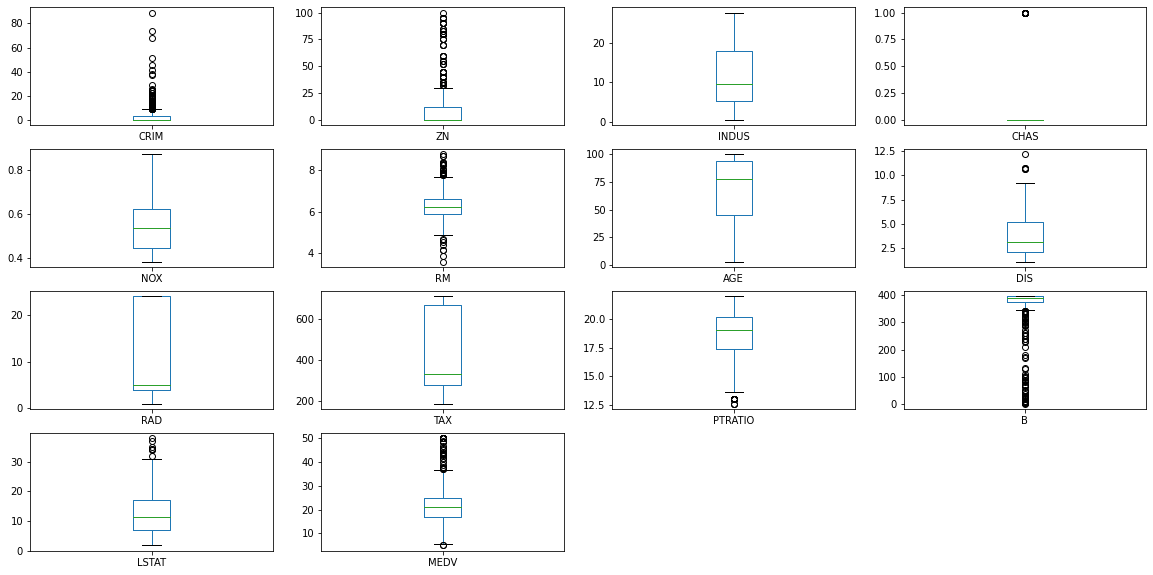

In [14]:
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(20, 10))
pyplot.show()

Having looked at the distribution and spread of data within each attribute, let's look at how the attributes interact. A Scatter Matrix plots all the numeric variables in a dataset against each other. 

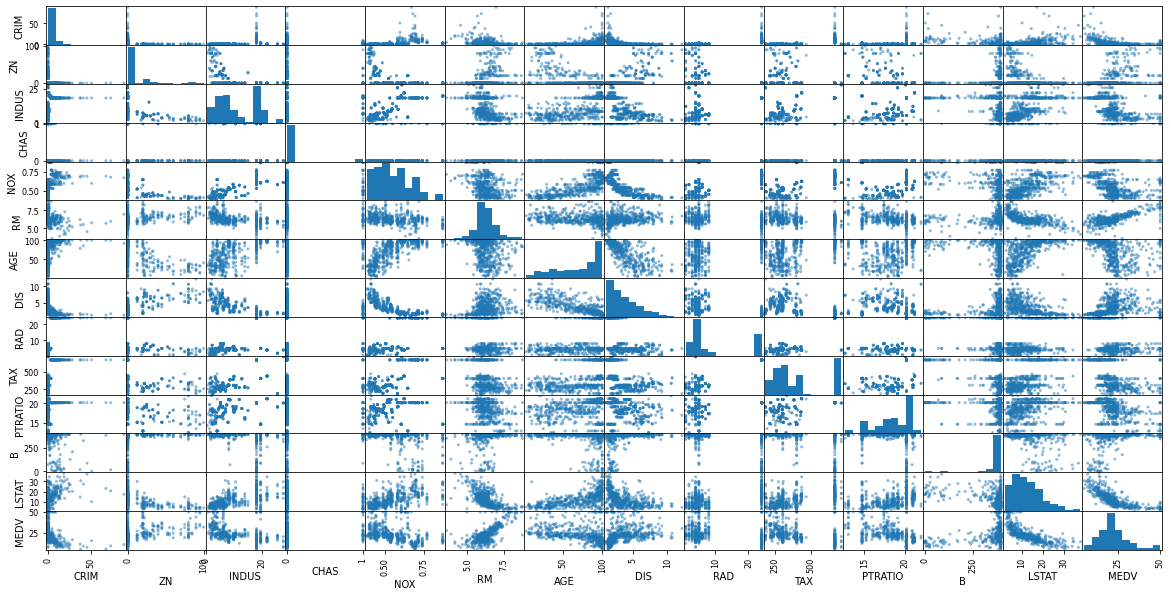

In [15]:
scatter_matrix(dataset,figsize=(20, 10))
pyplot.show()

The Scatter Matrix shows that the attributes identified as having a strong correlation have a clear relationship. But it is a little hard to view given the number of variables in the dataset. 

Let's look at the same information in pairplots to understand the relationships better.

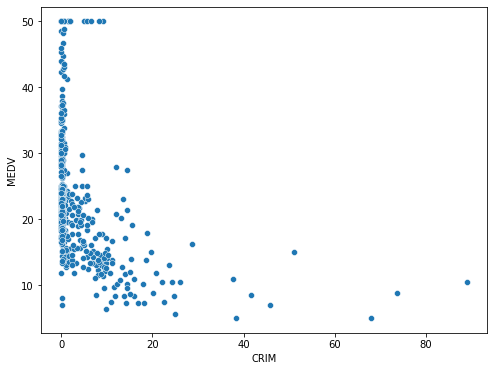

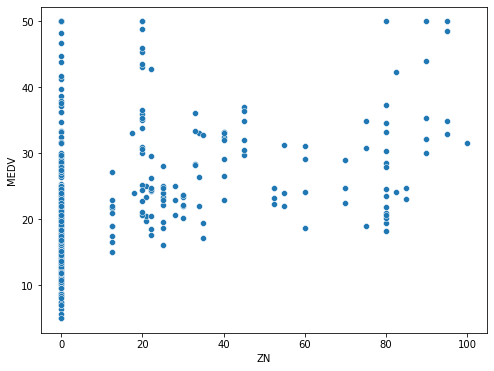

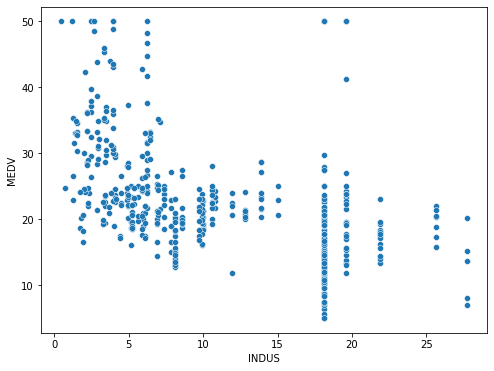

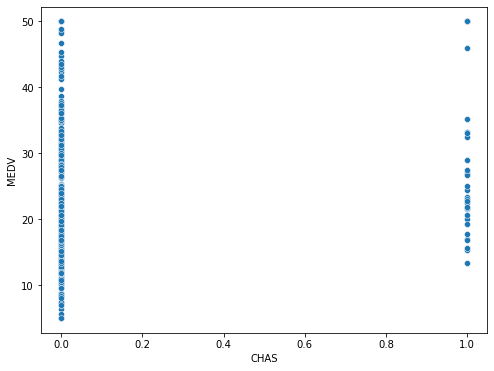

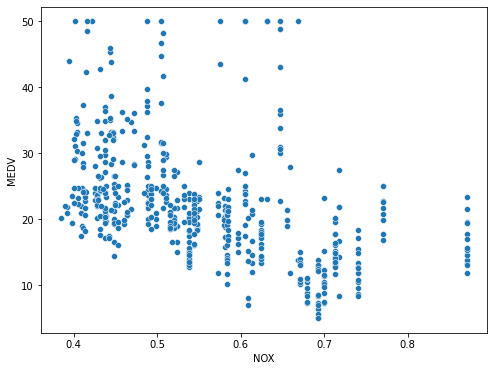

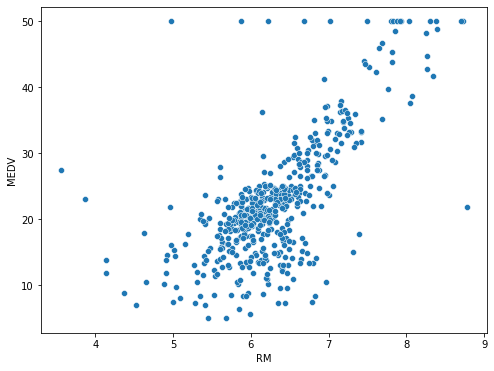

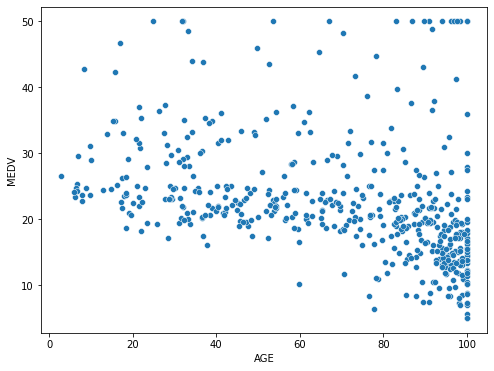

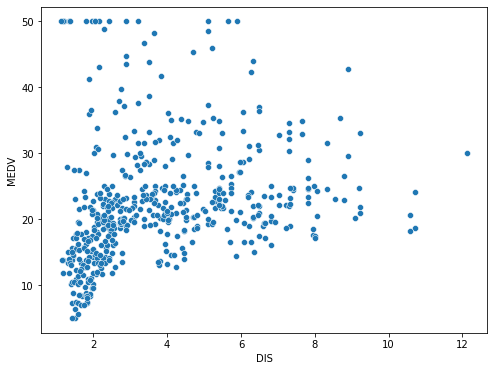

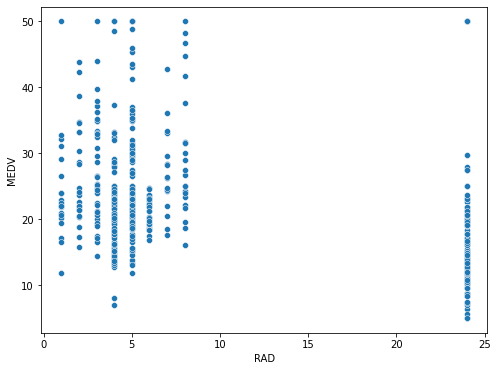

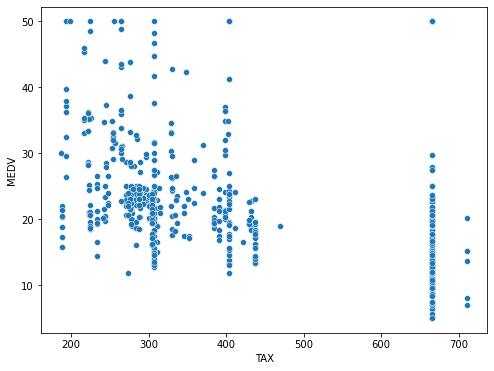

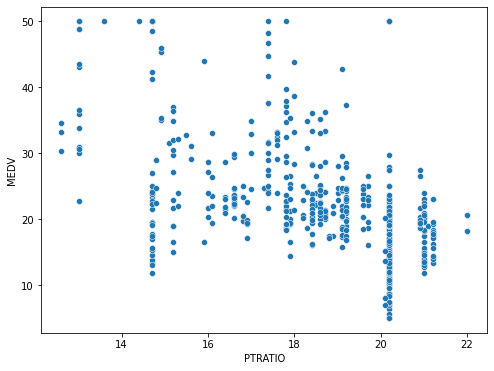

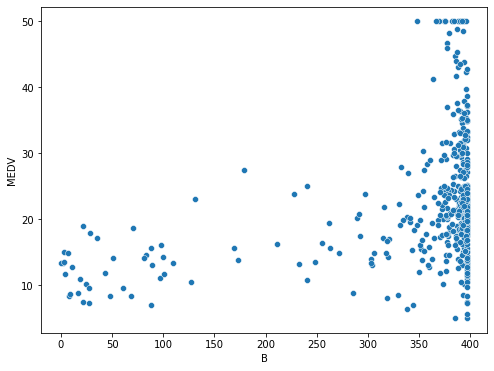

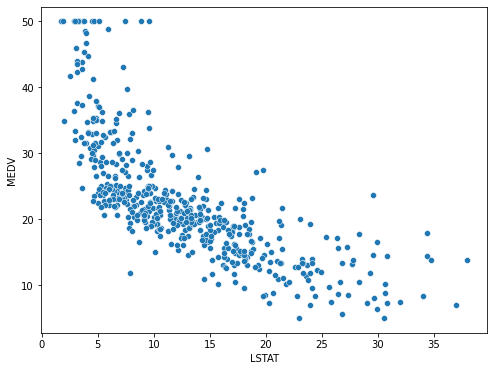

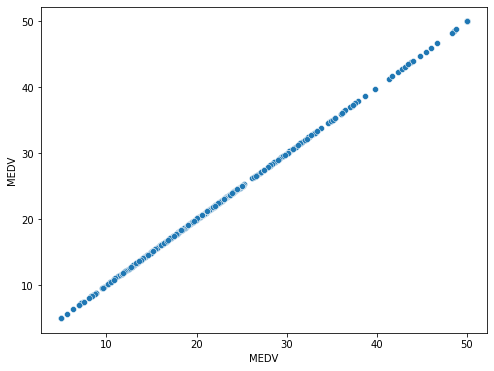

In [16]:
# pairplot with hue day
for i in dataset.columns:
  pyplot.figure(figsize=(8,6))
  sns.scatterplot(dataset[i],dataset['MEDV'])
  pyplot.xlabel(i)
  pyplot.ylabel('MEDV')
  pyplot.show()

We can investigate these relationships further by building a correlation matrix [36] [37]. This is a table showing correlation coefficients between the attributes. Each cell shows the correlation between two attributes. The values for this correlation is between -1 and 1 (vmin=-1, vmax=1)

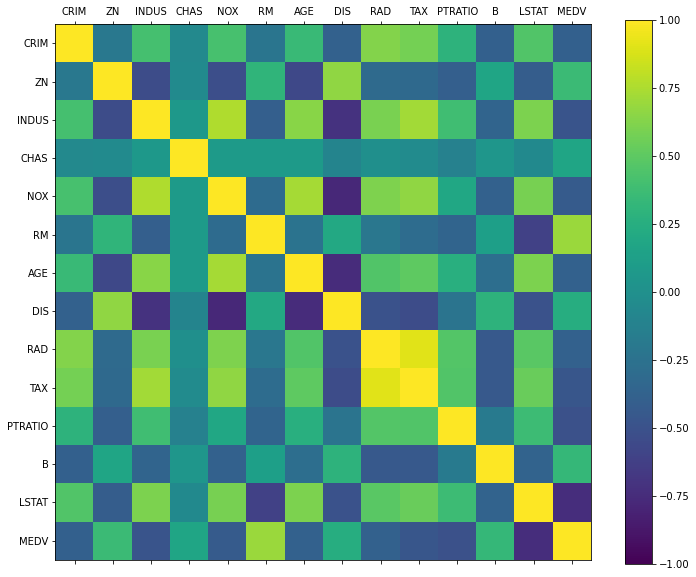

In [17]:
fig = pyplot.figure(figsize=(12, 10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

pyplot.show()

The yellow and lighter coloured cells show a positive correlation between attributes.
In contrast, the dark blue and other darker cells negatively correlate between attributes.

This process is repeated below, with the correlation value printed inside the cells to help identify outliers.

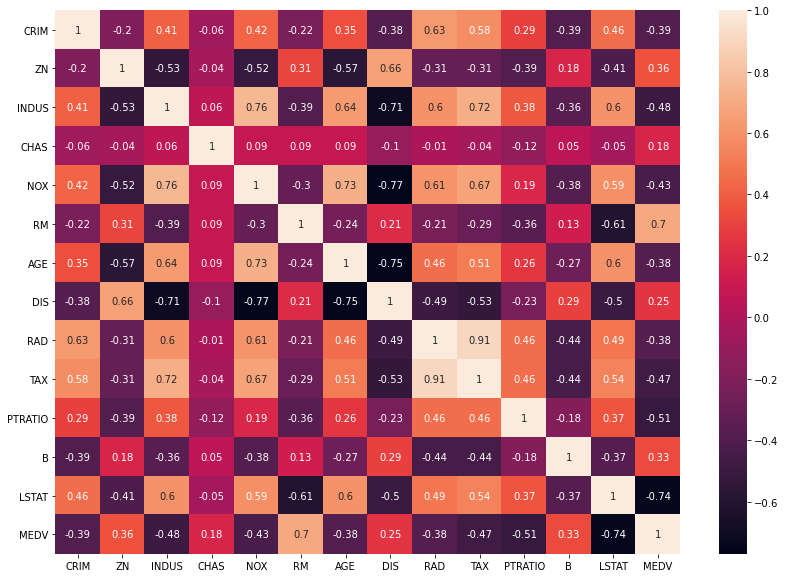

In [18]:
correlation_matrix = dataset.corr().round(2)
pyplot.figure(figsize=(14,10))
sns.heatmap(data=correlation_matrix,annot=True)
pyplot.show()

#### 3. Preprocessing

To check the model's accuracy, the dataset is split into two parts. The first is used to train the 'machine' and develop the model. This is usually the larger part in a two-way split on smaller and less complex datasets such as this one. The remainder of the data will be used to validate the model's performance (using algorithms from scikit-learn) once trained. By running a portion of unseen data through the trained model, it is possible to see if it is working and how well. The `sklearn.model_selection.train_test_split`[38] function supports this stage.

There is much debate over the optimum split in data for this stage. Generally, where a dataset is small or less complex, the 70:30 (training: validation) approach taken here is used. However, for more complex datasets (multi-dimensional) or a large volume of data, a heavier weighting toward training is advised to strengthen the machine learning process [39].

In [19]:
# Seperate out a validation set from the training set (test_size)
# have toke the 'MEDV' as dependent variable store in Y and all others as independent vatiables store in X for our models
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

# Train size 70%
# Test size 30%
test_size = 0.30

# Random state is 42
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

Alternatively, the dataset can be split three ways: training, validation and testing. The testing portion is used to test the general performance using data that has been unseen during the training and validation stages [40]. 

The scikit-learn library includes functions to complete k-fold cross-validation for evaluating the model's performance [41]. A 10-fold validation is applied here [42]. This splits the dataset into ten parts (folds). All bar one parts are trained, and the reserved part is then tested. This process repeats until all parts have been the test part. The result evaluates the model's performance based on ten cross-checks. 

A random state seed [43] is applied [44] to the data splitting to make the work reproducible.

In [20]:
# The K_Fold cross validation will validate algorithm 10 time
num_folds = 10

# Random state for K_Fold Cross Validation
seed = 7

# Using Mean Squared Error to gauge how many predictions are wrong
# Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy.
scoring = 'neg_mean_squared_error'

Next, we take the three algorithms selected for exploration.  

**Linear Regression (LR)**

Linear regression is a supervised machine learning model that looks at the relationship between variables [45]. There is an independent variable and a dependent variable in simple linear regression. The independent variable is the input value of the model. The predicted output for those values is the dependant variable.

Linear regression models look at the statistical relationship between these variables. It is not deterministic [46]. The input cannot entirely predict the output. But the relationship between the variables is close and continuous. 

Linear regression aims to find a line that best fits the data. That is a predicted line (line of regression) that sits close to the data (data points). Prediction errors create distance between the data and the line and reduce the model's accuracy [47]. 

<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/analyticsvidhya_linearregression.png">

Multiple Linear Regressions function similarly but have two or more independent variables.  

<br>

**K-Nearest Neighbours (KNN)**

K Nearest Neighbours is a non-linear supervised learning algorithm. It uses distance measures to find the most similar data to the one presented to predict its outcome [48]. 

It does this by plotting the data provided, looking at an identified datapoint and calculating the distance between it and the other data points. The closest data points to the one being examined (the nearest neighbours) are predicted to have an association [49]. Repeating this process for all data points in the training set provides the model with a series of outcomes. Averaging the results of these outcomes indicate the statistical relationship between the data points (variables) [50][51].
Setting the value of K determines how many data points are considered when reviewing the relationship between datapoints—for example, basing the connection on the two nearest neighbours to a data point or the seven nearest neighbours. 

<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/datacamp_KNN.PNG">


<br>

**Decision Tree Regression (CART)**

Decision Tree Regression is a supervised machine learning algorithm that models decisions through a tree-like structure – similar to a flow chart [52]. It is referred to as CART, which stands for Classification and Regression Tree algorithm.

It provides a graphical representation of the decision-making process, which may be more accessible than statistical information [53].

Starting from the Root Node (the dataset), branches flow to Interior Nodes where True/False decisions are made based on the features of the dataset [54]. This is repeated until an outcome is reached at the Leaf Node level. Finally, the average value of all data points in a Leaf Node is used to predict the probability of an event/output occurring. 


<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/decision-tree-classification-algorithm.png">

The algorithm can be used for classification and regression modelling with the scikit-learn library. 

In [21]:
# Storing three models in the list
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

Each will complete an initial test of mean and standard deviation of Mean Squared Error.

In [22]:
results = []
result = []
names = []

# Check the result of each of three models
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    result.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -25.592040 (10.491426)
KNN: -46.489825 (13.171346)
CART: -26.436465 (16.396015)


Linear Regression has the lowest Mean Squared Error (0 being the perfect score). The Decision Tree Regression is next, with scores close to Linear Regressions. K-Nearest neighbour is significantly different. 

We can visualise the scores from across all cross-validated folds to see the distribution of scores.

In [23]:
results

[array([-27.61488289, -50.18529916, -24.6277677 , -38.32597206,
        -20.11072026, -14.97773522, -26.02299355, -19.5838064 ,
        -14.99459267, -19.47663153]),
 array([-52.25972222, -39.06421111, -40.5502    , -56.16844444,
        -64.44962286, -44.54091429, -46.98818286, -66.27102857,
        -32.92829714, -21.67762286]),
 array([-23.99055556, -24.68194444, -18.02527778, -17.61944444,
        -21.60657143, -15.762     , -42.21028571, -69.858     ,
        -17.69514286, -12.91542857])]

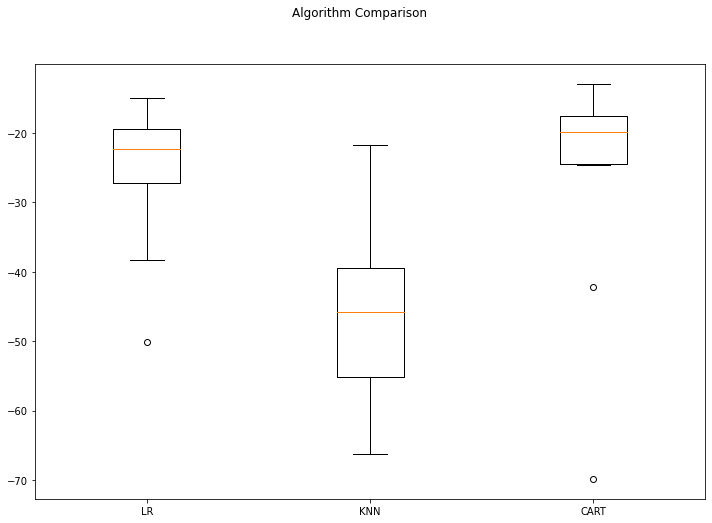

In [24]:
fig = pyplot.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The distributions appear to be similar even for the K-Nearest neighbour.

This box plot shows the range of scoring for each model. In Linear Regression, the values of the upper and lower ranges are very close to each other. While in the other, these are a bit away from each other.

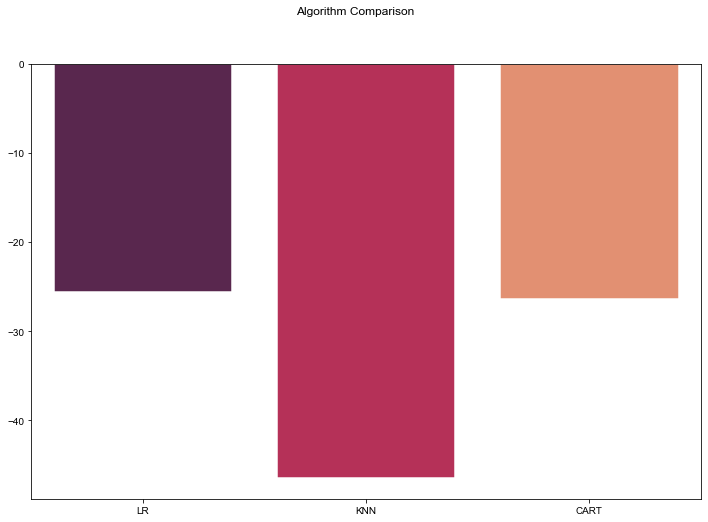

In [25]:
fig = pyplot.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.set_theme(style="white", context="talk")
sns.barplot(names,result,palette="rocket")
#ax.set_xticklabels(names)
pyplot.show()

**Standardisation and Scaling**

Standardisation and scaling translate attribute values to more comparable scales [55] [56]. This refers back to the importance of the data fed into a model. The 'machine' will learn and predict based on the information provided. For example, comparing a jewellery store dataset with stock values from 0 to 100 and gold carat values from 1 to 5 may give more weight to the 100 stock units. The standard deviation and mean values for input data are brought closer to a normal distribution through standardising and scaling, making them much more comparable.

The scikit-learn functions to transform [57] data in this way are in the `sklearn.preprocessing` library.

Here we will transform the data using the standardisation functions and rerun the test of mean and standard deviation of Mean Squared Error for each algorithm.

Pipeline sare used to automate the workflow. Pipelines operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative. 

In [26]:
# temp array
pipelines = []

# https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

# temp arrays
results = []
names = []
result = []
for name, model in pipelines:
    
    kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    result.append(cv_results.mean())
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -25.592040 (10.491426)
ScaledKNN: -23.887351 (13.841197)
ScaledCART: -28.240221 (14.594026)


We can see that standardising and scaling the data has brought the K-Nearest Neighbours regression in line with the other results - in fact; it now returns the best score. 

Let's see how the distribution of scores looks following the data transformation.

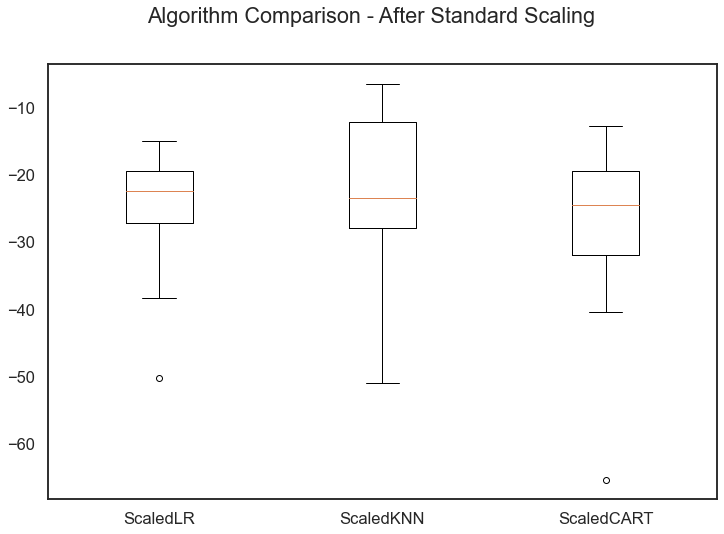

In [27]:
fig = pyplot.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison - After Standard Scaling')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

All three algorithms are now showing a neater distribution of errors.

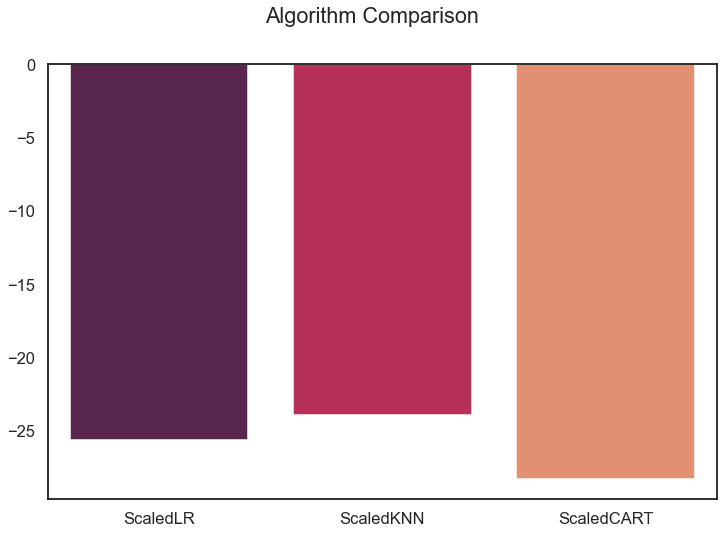

In [28]:
fig = pyplot.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.set_theme(style="white", context="talk")
sns.barplot(names,result,palette="rocket")
#ax.set_xticklabels(names)
pyplot.show()

#### 4. Approach 1

Here each algorithm is applied against the now stndardised data. The approached used is minimal scripting with the maxium efficiency of the scikit-learn library.

**Linear Regression**

In [29]:
LModel = LinearRegression()

In [30]:
# Creating the model on Training Data
LRModel = LModel.fit(X_train, Y_train)
prediction = LRModel.predict(X_test)

In [31]:
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(Y_train, LRModel.predict(X_train)))

R2 Value: 0.7434997532004697


In [32]:
Accuracy_Values=cross_val_score(LRModel, X , Y, cv=10, scoring=scoring)

In [33]:
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]

Final Average Accuracy of the model: -34.71


**KNN Regression**

In [34]:
KModel = KNeighborsRegressor(n_neighbors=3)

In [35]:
# Creating the model on Training Data
KNN = KModel.fit(X_train, Y_train)
prediction = KNN.predict(X_test)

In [36]:
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(Y_train, KNN.predict(X_train)))

R2 Value: 0.7359207696922753


In [37]:
Accuracy_Values=cross_val_score(KModel, X , Y, cv=10, scoring=scoring)

In [38]:
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [ -88.17943355  -62.99350763 -286.86671024 -160.49098039  -98.22703704
 -131.25864924  -44.50388889 -138.76806667  -23.85564444  -22.00324444]

Final Average Accuracy of the model: -105.71


**Decision Tree Regression**

In [39]:
DTModel = DecisionTreeRegressor(max_depth=5,criterion='mse')

In [40]:
# Creating the model on Training Data
DT = DTModel.fit(X_train, Y_train)
prediction=DT.predict(X_test)

In [41]:
print('R2 Value:',metrics.r2_score(Y_train, DT.predict(X_train)))

R2 Value: 0.9277198621718044


In [42]:
Accuracy_Values=cross_val_score(DTModel, X , Y, cv=10, scoring=scoring)

In [43]:
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [-14.09457202  -5.80169716 -11.8733911  -83.95899801 -14.96779075
 -67.02674931 -10.99383361 -88.10024697 -56.90168294 -38.30331166]

Final Average Accuracy of the model: -39.2


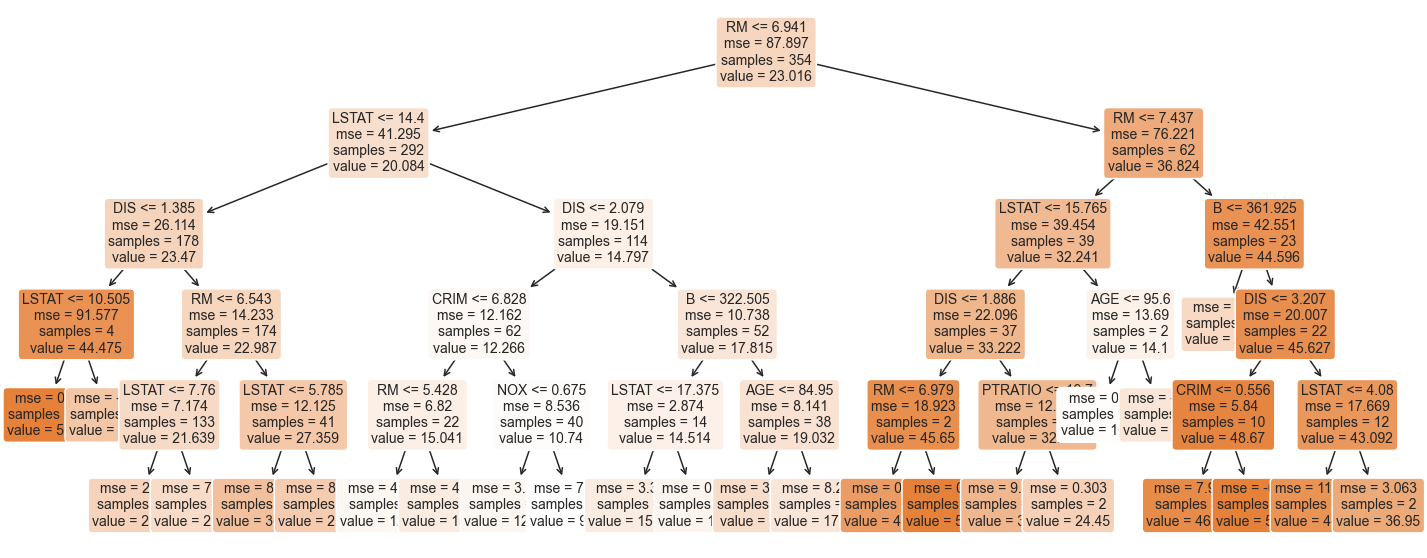

In [44]:
pyplot.figure(figsize=(25,10))
a = plot_tree(DTModel, 
              feature_names=dataset.drop('MEDV',axis=1).columns, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

#### 5. Approach 2

Here the dataset is reloaded and each regression algorithm applied in a procedural approach. 


**Linear Regression**

In [45]:
# Here we take ['LSTAT','RM'] as independent variables while 'MEDV' as dependent variable for our models
X = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
Y = dataset['MEDV']

# Train size 70%
# Test size 30%
test_size = 0.30

# Random state is 42
seed = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

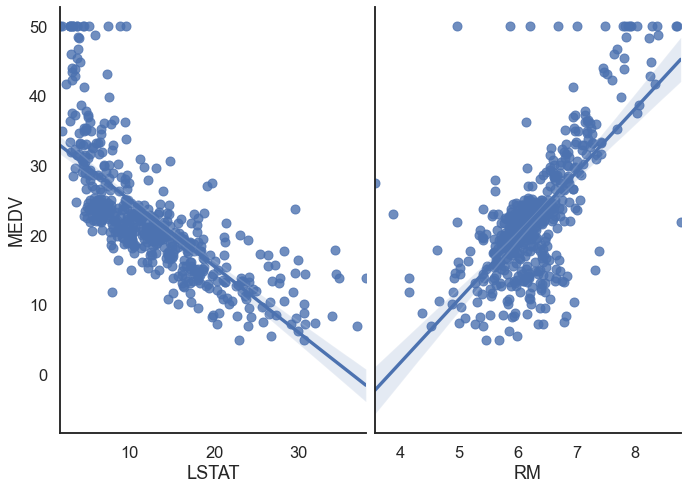

In [46]:
#Plotting the Least Squares Line
sns.pairplot(dataset, x_vars=['LSTAT','RM'], y_vars='MEDV', size=7, aspect=0.7, kind='reg')

In [47]:
# Measuring Goodness of fit in Training data
y_train_predict = lin_model.predict(X_train)
r2 = metrics.r2_score(Y_train, y_train_predict)
print('R2 Value (Train):',metrics.r2_score(Y_train, y_train_predict))

R2 Value (Train): 0.6486379416291157


In [48]:
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
print("RMSE is (Train): {}". format(rmse))

RMSE is (Train): 5.557293000952383


In [49]:
# Eavluating testing set
y_test_predict = lin_model.predict(X_test)
r2 = metrics.r2_score(Y_test, y_test_predict)
print('Linear Regression R2 Value (Test):',metrics.r2_score(Y_test, y_test_predict))

Linear Regression R2 Value (Test): 0.5998518447715597


In [50]:
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print('Linear Regression RMSE (Test) is {}'.format(rmse))

Linear Regression RMSE (Test) is 5.46042834691954


**Decision Tree Regression**

In [51]:
# Here we take ['LSTAT','RM'] as independent variables while 'MEDV' as dependent variable for our models
X = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
Y = dataset['MEDV']

# Train size 70%
# Test size 30%
test_size = 0.30

# Random state is 42
seed = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [52]:
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg = regressor.fit(X_train, Y_train)

In [53]:
print('Decision Tree Regression Score (Train):', DT_reg.score(X_train,Y_train))
print('Decision Tree Regression Score (Test):', DT_reg.score(X_test,Y_test))

Decision Tree Regression Score (Train): 0.905924946302955
Decision Tree Regression Score (Test): 0.6749061917473429


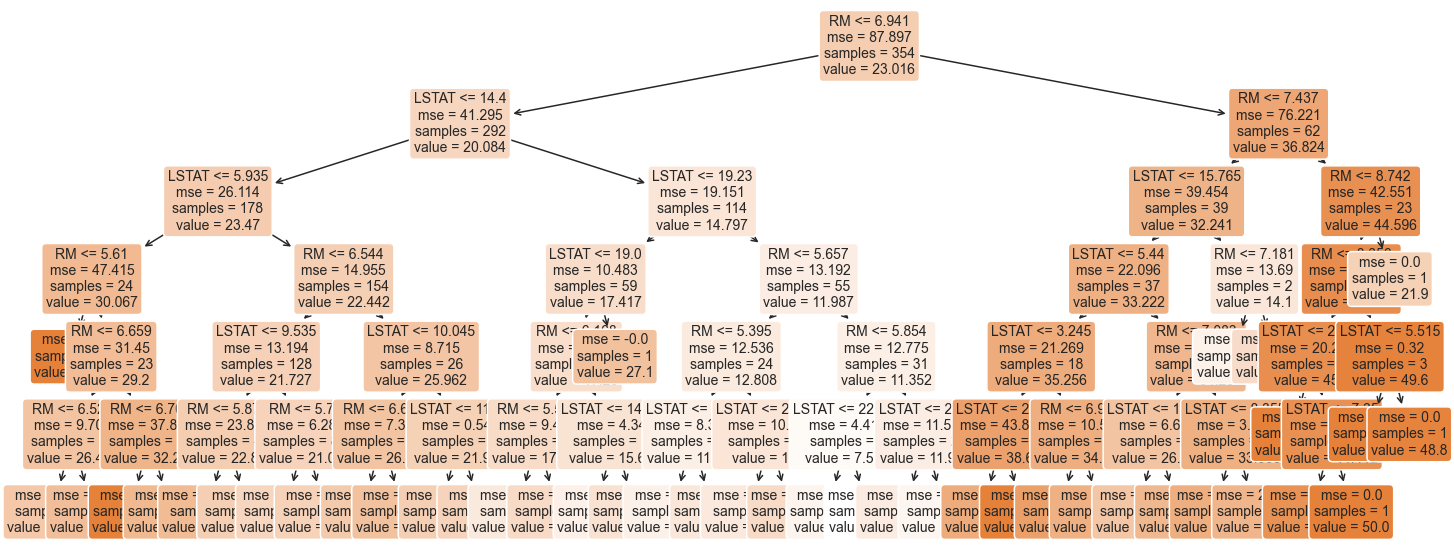

In [54]:
pyplot.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

**KNN Regression**

In [55]:
# Here we take ['LSTAT','RM'] as independent variables while 'MEDV' as dependent variable for our models
X = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
Y = dataset['MEDV']

# Train size 70%
# Test size 30%
test_size = 0.30

# Random state is 42
seed = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [56]:
ss_X = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [57]:
#ss_Y = StandardScaler()
#Y_train = ss_Y.fit_transform(Y_train.reshape(-1, 1))
#Y_test = ss_Y.transform(Y_test.reshape(-1, 1))

In [58]:
uni_knr = KNeighborsRegressor(weights="uniform")

In [59]:
uni_knr.fit(X_train, Y_train)

KNeighborsRegressor()

In [60]:
uni_knr_Y_predict = uni_knr.predict(X_test)

In [61]:
print("The average K-Nearest Neighbor Regression value:", uni_knr.score(X_test, Y_test))

The average K-Nearest Neighbor Regression value: 0.7318033779966358


In [62]:
print("K-Nearest Neighbor Regression R_squared Value:" ,metrics.r2_score(Y_test, uni_knr_Y_predict))

K-Nearest Neighbor Regression R_squared Value: 0.7318033779966358


### Conclusion

In truth, machine learning is the cold hard maths of statistical analysis. But it is operated on a scale beyond regular human capabilities*. The scikit-learn library takes the wealth of knowledge available in those fields – from initial development to innovative use by its community – and presents an accessible toolkit for users. The distinction of the library as a toolkit is essential. The models and algorithms of machine learning will do as programmed. As a programmer, it is vital to understand the data, the models and algorithms available and the desired outcome to choose the best fit for the data you are working with.

Scikit-learn makes it easy to explore the different modules it operates and build on models to improve their accuracy continually. It is easy to see why it is one of the most popular Python libraries.

<br>

 \* *Perhaps a new Marvel superhero called Numero who uses advanced statistical skills (following an incident with a calculator and a radioactive substance) to predict and prevent crimes.*
 
***

# Bibliography

1.	https://www.geeksforgeeks.org/introduction-of-statistics-and-its-types/?ref=lbp
2.	https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html
3.	https://archive.ics.uci.edu/ml/datasets/wine
4.	https://scikit-learn.org/stable/index.html
5.	https://www.python.org/
6.	(https://summerofcode.withgoogle.com/
7.	https://www.tutorialspoint.com/scikit_lear/scikit_learn_introduction.htm
8.	https://scikit-learn.org/stable/model_selection.html,
9.	https://scikit-learn.org/stable/data_transforms.html
10.	https://www.zdnet.com/article/programming-languages-javascript-has-most-developers-but-rust-is-the-fastest-growing/
11.	https://scipy.org/
12.	https://steelkiwi.com/blog/python-for-ai-and-machine-learning/
13.	https://towardsdatascience.com/clearly-explained-4-types-of-machine-learning-algorithms-71304380c59a 
14.	https://scikit-learn.org/stable/supervised_learning.html
15.	https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression
16.	https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
17.	https://towardsdatascience.com/clearly-explained-4-types-of-machine-learning-algorithms-71304380c59a 
18.	https://scikit-learn.org/stable/unsupervised_learning.html
19.	https://scikit-learn.org/stable/modules/decomposition.html#factor-analysis
20.	https://scikit-learn.org/stable/modules/outlier_detection.html#id1
21.	https://towardsdatascience.com/clearly-explained-4-types-of-machine-learning-algorithms-71304380c59a
22.	https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.SelfTrainingClassifier.html
23.	https://towardsdatascience.com/self-training-classifier-how-to-make-any-algorithm-behave-like-a-semi-supervised-one-2958e7b54ab7
24.	https://towardsdatascience.com/clearly-explained-4-types-of-machine-learning-algorithms-71304380c59a
25.	https://scikit-learn.org/stable/faq.html#why-is-there-no-support-for-deep-or-reinforcement-learning-will-there-be-support-for-deep-or-reinforcement-learning-in-scikit-learn
26.	http://lib.stat.cmu.edu/datasets/boston
27.	https://archive.ics.uci.edu/ml/index.php
28.	https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8
29.	https://scikit-learn.org/stable/inspection.html
30.	https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95
31.	https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404
32.	https://scikit-learn.org/stable/visualizations.html
33.	https://www.w3schools.com/python/numpy/numpy_random_exponential.asp
34.	https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
35.	https://www.w3schools.com/statistics/statistics_box_plots.php
36.	https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
37.	https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
38.	https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
39.	https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
40.	https://vitalflux.com/machine-learning-training-validation-test-data-set/
41.	https://scikit-learn.org/stable/modules/cross_validation.html
42.	https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0
43.	https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.RandomState.seed.htm
44.	https://hitchhikers.fandom.com/wiki/42
45.	https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
46.	https://towardsdatascience.com/a-simple-guide-to-linear-regression-using-python-7050e8c751c1
47.	https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/
48.	https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
49.	https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
50.	https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/ 
51.	https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
52.	https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
53.	https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm
54.	https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda
55.	https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
56.	https://towardsdatascience.com/data-preprocessing-with-scikit-learn-standardization-and-scaling-cfb695280412
57.	https://scikit-learn.org/stable/data_transforms.html


***

# References
1.	https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
2.	http://lib.stat.cmu.edu/datasets/boston
3. https://machinelearningmastery.com/

# End